**Agenda**

    - Bit manipulation
          - Bitwise Operations and Bitmasks
          -  XOR trick
          -  subsets, builtin functions
    - Recursion and Back Tracking
          - sudoku solver, N-queen, N-knight, subsets

##**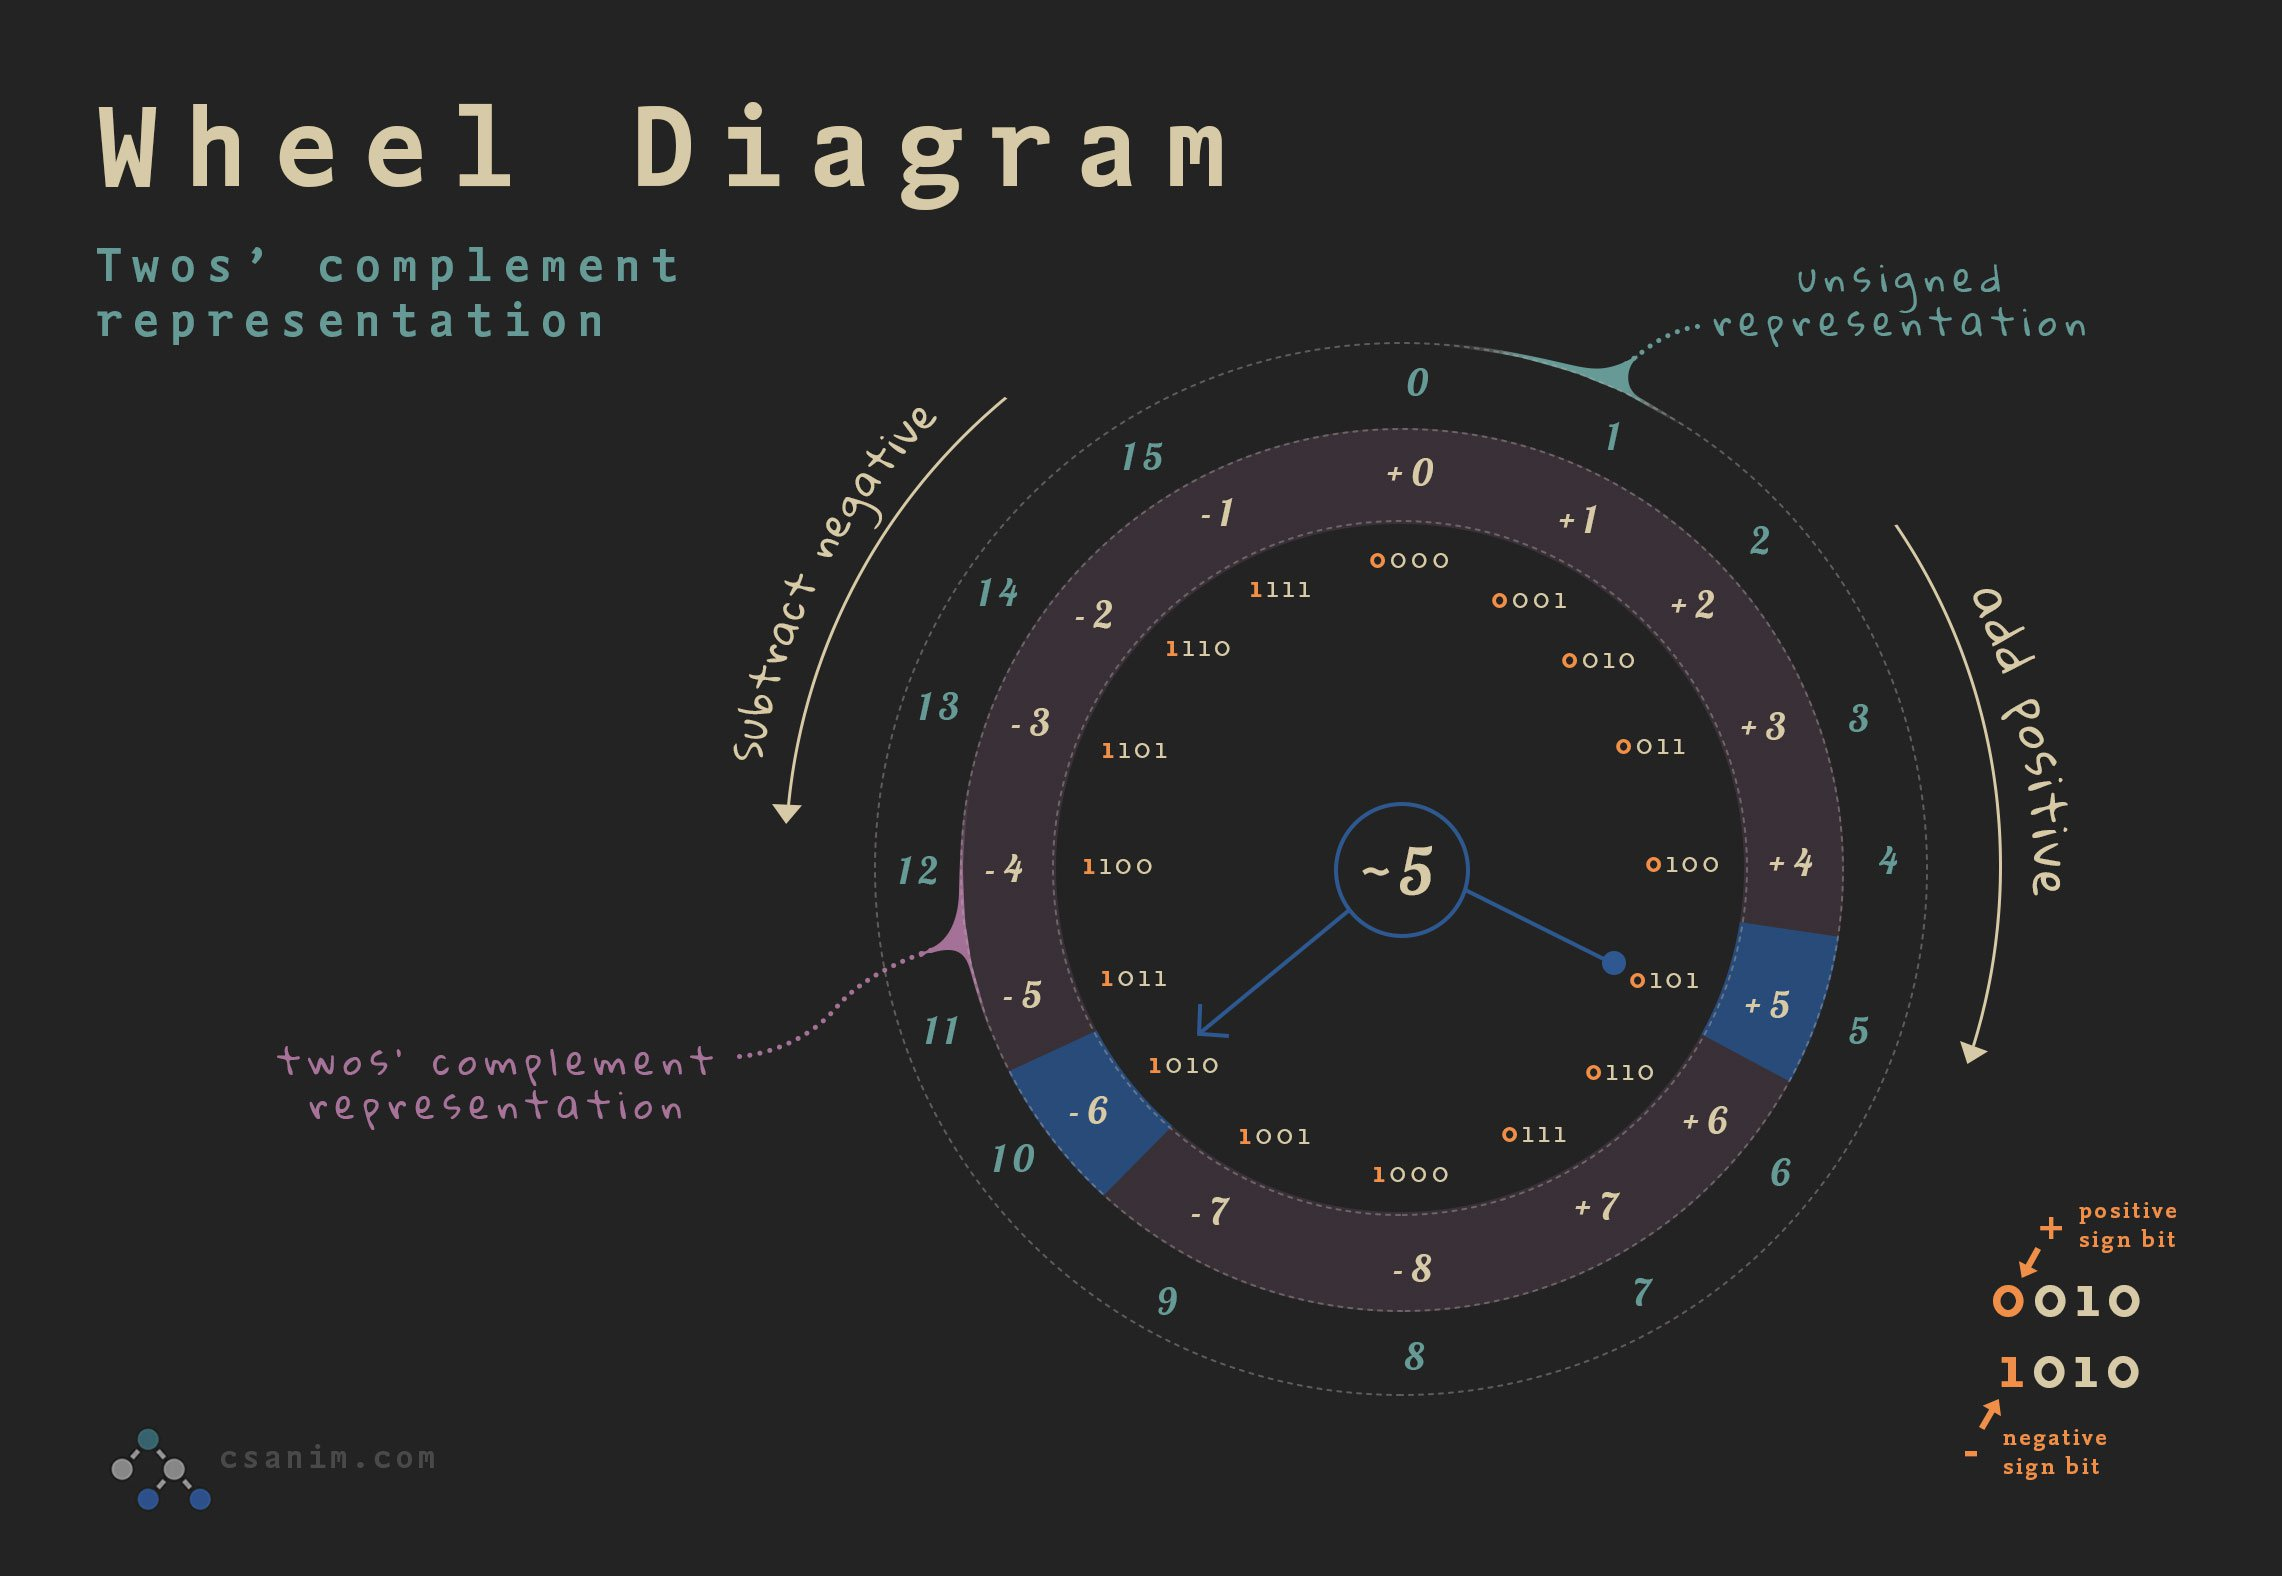Number systems**
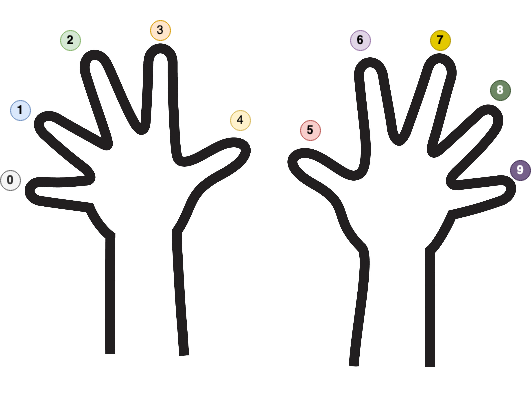

Computers have only two fingers: 1 and 0- circuits - “on” or “off” - binary digit or in short, a bit


Play with base conversions like hexa decimal to octal, octal to binary directly.

## Bitwise Operations



These operations operate independently bit wise and hence the name.




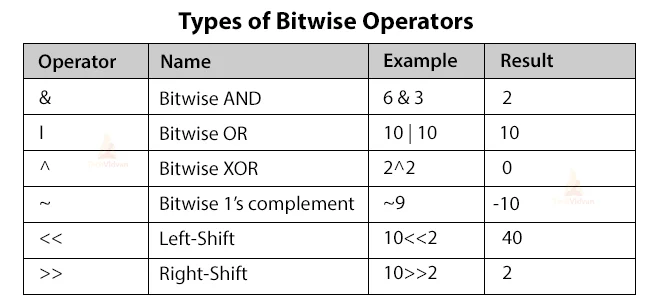






Bitwise operations are insanely **fast** than arithmetic operations.

**eg** - x%2 == 1 vs x & 1,  a * $2^b$ vs a << b

In [ ]:


 %%writefile isPowerOfTwo.cpp



//check whether a number is a power of 2 or not

 bool isPowerOfTwo(int x)   // O(logn)
    {
        if(x == 0)
            return false;
        else
        {
            while(x % 2 == 0) x /= 2;
            return (x == 1);
            }
    }

 bool isPowerOfTwo(int x)
    {
        // x will check if x == 0 and !(x & (x - 1)) will check if x is a power of 2 or not
        return (x && !(x & (x - 1)));
    }


Overwriting isPowerOfTwo.cpp


In [ ]:
 %%writefile BinRep.cpp


// C++ Program for the binary
// representation of a given number

#include <iostream>

using namespace std;

void bin(unsigned long n) {
    for (unsigned long i = 1UL << (sizeof(n) * 8 - 1); i > 0; i = i >> 1) {
        if ((n & i) != 0) {
            cout << "1";
        } else {
            cout << "0";
        }
    }
}

int main() {
    bin(42014369);
    cout << endl;
    bin(-7777); // Or any other negative number
    cout << endl;
    return 0;
}


Overwriting BinRep.cpp


In [ ]:
%%script bash

g++ BinRep.cpp -std=c++11
./a.out

0000000000000000000000000000000000000010100000010001011010100001
1111111111111111111111111111111111111111111111111110000110011111


**Get/Set/flip/clear a bit**

Using bitwise shifts and some basic bitwise operations we can easily set, flip or clear a bit.

$1 \ll x$  is a number with only the
$x$ -th bit set

$\sim(1 \ll x)$  is a number with all bits set except the
$x$ -th bit.




 $n ~\&~ (1 \ll x)$  gets the
$x$ -th bit in the number
$n$


$n ~|~ (1 \ll x)$  sets the
$x$ -th bit in the number
$n$


$n ~\wedge~ (1 \ll x)$  flips the
$x$ -th bit in the number
$n$


$n ~\&~ \sim(1 \ll x)$  clears the
$x$ -th bit in the number
$n$




In [ ]:
%%writefile count.cpp

// Count the number of ones in the binary representation of the given number.
// O(k)
#include <iostream>

using namespace std;

int countSetBits(int n)
{
    int count = 0;
    while (n)
    {
        n = n & (n - 1);
        count++;
    }
    return count;
}

int main() {
    cout << countSetBits(42014369);


    return 0;
}

Overwriting count.cpp


In [ ]:
%%script bash

g++ count.cpp -std=c++11
./a.out

9

### Sequence of XOR Operations

**The XOR Trick**

 If we have a sequence of XOR operations a ^ b ^ c ^ ..., then we can remove all pairs of duplicated values without affecting the result.

 Since x ^ x = 0 and a ^ 0 = a, each pair of duplicated values has no effect on the outcome.

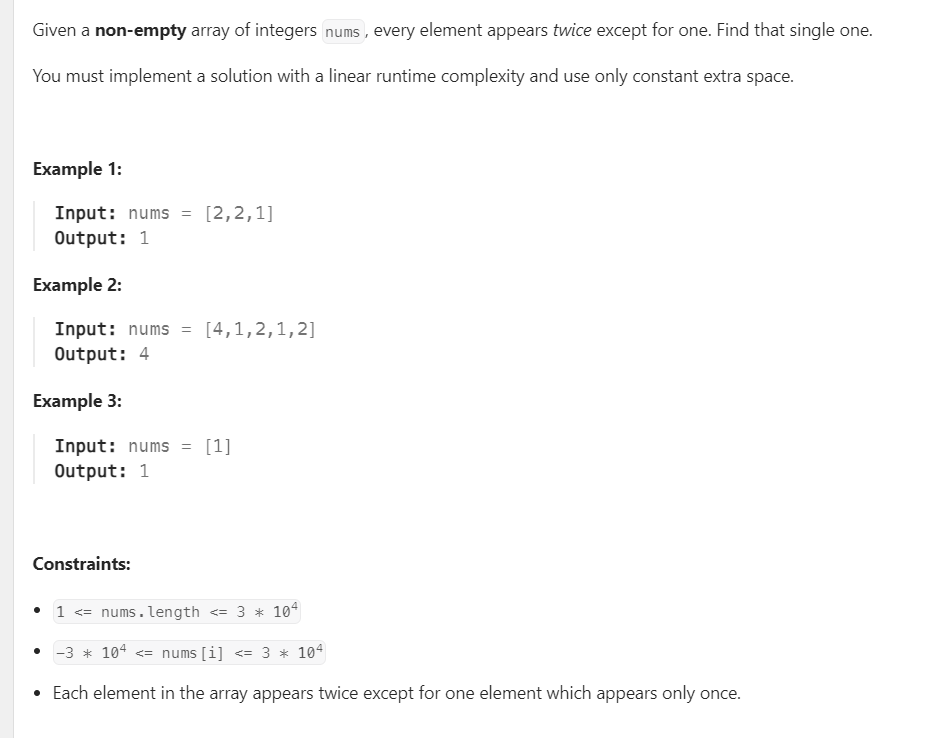

Hint: XOR all the elements


**Some useful identities**

a + b = a ^ b + 2(a & b)

a + b = a | b + a & b

a ^ b >= |a - b|

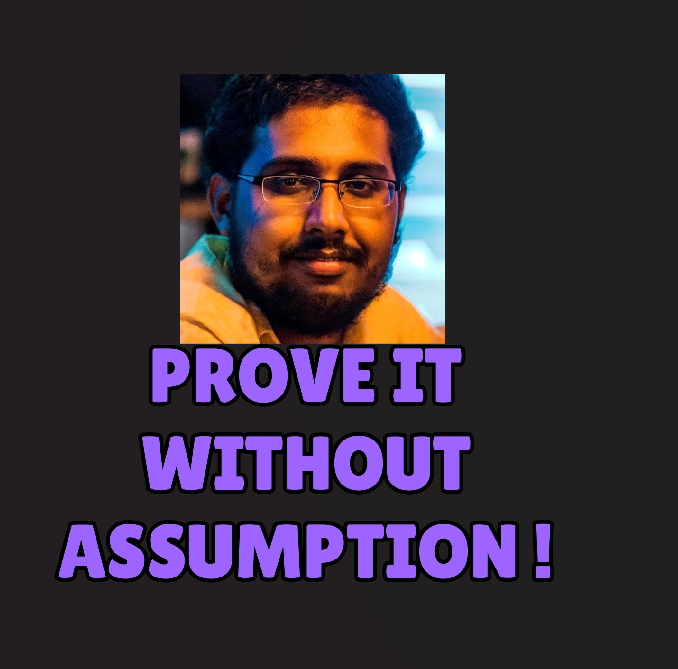












**Example Problem** -

 Find the number of pairs (a,b) such that

 a + b = p

 a ^ b = q (where p = 12345678, q = 42014369  )

Visit this [blog](https://codeforces.com/blog/entry/94470) for some more identities

### Builtin functions

\__builtin_popcount(unsigned int) returns the number of set bits(\__builtin_popcount(0b0001'0010'1100) == 4)

\__builtin_ffs(int) finds the index of the first (most right) set bit (\__builtin_ffs(0b0001'0010'1100) == 3)

\__builtin_clz(unsigned int) the count of leading zeros (\__builtin_clz(0b0001'0010'1100) == 23)

\__builtin_ctz(unsigned int) the count of trailing zeros (\__builtin_ctz(0b0001'0010'1100) == 2)

In [ ]:

%%writefile nextpowof2.cpp

#include<bits/stdc++.h>
using namespace std;

long long nextPowerOf2(long long N)
{
    // if N is a power of two simply return it

    if (!(N & (N - 1)))
        return N;

    // else set only the left bit of most significant bit
    return 0x8000000000000000 >> (__builtin_clzll(N) - 1);
}

// int cnt=0;
// 		for(int i=0; i<32; ++i)
// 		{
// 			if(((n>>i)&1) == 1)
// 			{
// 				cnt=i;    //cnt tells MSB position
// 			}
// 		}


int main()
{
    long long n = 2024;
    cout << nextPowerOf2(n);
    return 0;
}

Overwriting nextpowof2.cpp


In [ ]:
%%script bash

g++ nextpowof2.cpp -std=c++11
./a.out

2048

### Print all the possible subset/subsequesnces of a set

Given a string, find all the possible subsequences of the string.

Example 1: \\
Input: str = "abc" \\
Output: a ab abc ac b bc c \\
Explanation: Printing all the 7 subsequence for the string "abc".

In [ ]:

%%writefile subsequences.cpp

#include <bits/stdc++.h>
using namespace std;


vector<string> subsequences(string str){

    vector<string>v;
    int n=str.length();
    int subset=(1<<n);

    for(int nums=1; nums<subset; nums++){
        string s = "";
        for(int i=0; i<n; i++){
            if(nums&(1<<i)){
                s += str[i];
            }
        }
       v.push_back(s);
    }
    return v;

}

int main()
{


	string s="abc";
	vector<string>ans = subsequences(s);

	cout<<"All possible subsequences are "<<endl;
	for (auto it : ans) {
		cout << it << " ";
	}

}

Overwriting subsequences.cpp


In [ ]:
%%script bash

g++ subsequences.cpp -std=c++11
./a.out

All possible subsequences are 
a b ab c ac bc abc 

In [ ]:
%%writefile subsets.cpp


#include<iostream>
#include<cstring>
using namespace std;

void overLaynumber(char arr[],int number){

	int j = 0;

	while(number > 0){
		int last_bit = number & 1;
		if(last_bit){
			cout<<arr[j];
		}

		j++;
		number = number >> 1;
	}
	cout <<endl;
}


void generateAllSubsequences(char arr[]){

	int n = strlen(arr);

	for(int i=0; i < (1<<n);i++){
		overLaynumber(arr,i);
	}
	return;
}



int main(){
	//Subsets / Subsequences
	char arr[10000] = "Harbola";
	// cin>> arr;
	generateAllSubsequences(arr);



}

Overwriting subsets.cpp


In [ ]:
%%script bash

g++ subsets.cpp -std=c++11
./a.out


H
a
Ha
r
Hr
ar
Har
b
Hb
ab
Hab
rb
Hrb
arb
Harb
o
Ho
ao
Hao
ro
Hro
aro
Haro
bo
Hbo
abo
Habo
rbo
Hrbo
arbo
Harbo
l
Hl
al
Hal
rl
Hrl
arl
Harl
bl
Hbl
abl
Habl
rbl
Hrbl
arbl
Harbl
ol
Hol
aol
Haol
rol
Hrol
arol
Harol
bol
Hbol
abol
Habol
rbol
Hrbol
arbol
Harbol
a
Ha
aa
Haa
ra
Hra
ara
Hara
ba
Hba
aba
Haba
rba
Hrba
arba
Harba
oa
Hoa
aoa
Haoa
roa
Hroa
aroa
Haroa
boa
Hboa
aboa
Haboa
rboa
Hrboa
arboa
Harboa
la
Hla
ala
Hala
rla
Hrla
arla
Harla
bla
Hbla
abla
Habla
rbla
Hrbla
arbla
Harbla
ola
Hola
aola
Haola
rola
Hrola
arola
Harola
bola
Hbola
abola
Habola
rbola
Hrbola
arbola
Harbola


# Recursive Backtracking

**The basic idea behind backtracking:**

we take a path toward a solution, making **choices** at different decision points as we go, and if we reach a dead end (where there are no more decision points and we haven't found the solution we're looking for), we **backtrack** -- i.e., go back to the last point where we made a decision, and **make a different choice** (if there are any remaining).


Fundamental Backtracking Paradigm:

**"Choose, Explore, Unchoose"**


In [ ]:
%%writefile rec.cpp


#include <bits/stdc++.h>
using namespace std;

// Takes a string and prints it using set notation, where each character is treated
// as an element in the set. For example, "abc" is printed as: {a, b, c}
void fancyPrint(string s)
{
   cout << "{";

   for (int i = 0; i < s.length(); i++)
   {
      cout << s[i];

      // We don't need a comma after our last element in the set, but we do want a
      // comma after all the others.
      if (i != s.length() - 1)
      {
         cout << ", ";
      }
   }

   cout << "}" << endl;
}

// 'soFar' is the (sub)set we have built so far. 'rest' contains the elements about
// which we have yet to make our binary choice (either include or throw away as we
// generate all possible subsets).
void printSubsets(string soFar, string rest)
{
   if (rest.empty())
   {
      fancyPrint(soFar);
      return;
   }

   // Pluck an element from our set of remaining elements ('rest'). Below, we will
   // make a binary choice about whether to include thisOne in the subsets we
   // generate.
   char thisOne = rest[0];
   string newRest = rest.substr(1);

   // This is the recursive call where we simply discard thisOne.
   printSubsets(soFar, newRest);

   // This is the recursive call where we include thisOne in our new subset.
   printSubsets(soFar + thisOne, newRest);
}

// For simplicity, we represent our sets as strings. Each character is considered
// an element. For example, the set {a, b, c} is represented as the string "abc".
void printSubsets(string s)
{
   printSubsets("", s);
}

int main()
{
   printSubsets("abc");
   return 0;
}

Overwriting rec.cpp


In [ ]:
%%script bash

g++ rec.cpp -std=c++11
./a.out

{}
{c}
{b}
{b, c}
{a}
{a, c}
{a, b}
{a, b, c}


# N Queens Problem


1) Print any one configuration\
2) Print all configurations\
3) Find total number of configurations

http://algoanim.ide.sk/index.php?page=showanim&id=76




In [ ]:
%%writefile NQueenOneConf.cpp


#include <iostream>
using namespace std;

bool canPlace(int board[][20],int n,int x,int y){

    //Column
    for(int k=0;k<x;k++){
        if(board[k][y]==1){
            return false;
        }
    }
    //Left Diag
    int i = x;
    int j = y;
    while(i>=0 and j>=0){
        if(board[i][j]==1){
            return false;
        }
        i--; j--;
    }

    //Right Diag
    i = x;
    j = y;
    while(i>=0 and j<n){
        if(board[i][j]==1){
            return false;
        }
        i--; j++;
    }
    return true;
}

void printBoard(int n,int board[][20]){

    for(int i=0;i<n;i++){
        for(int j=0;j<n;j++){
            cout<< board[i][j]<<" ";
        }
        cout<<endl;
    }
    cout <<endl;
}

bool solveNQueen(int n,int board[][20],int i){
    //base case
    if(i==n){
        //Print the board
        printBoard(n,board);
        return true;
    }


    // rec case
    // try to place a queen in every row
    for(int j=0;j<n;j++){
        //whether the current i,j is safe or not
        if(canPlace(board,n,i,j)){
            board[i][j] = 1;
            bool success = solveNQueen(n,board,i+1);
            if(success){
                return true;
            }
            //backtrack
            board[i][j] = 0;
        }
    }
    return false;
}

int main() {

    int board[20][20] = {0};
    int n=9;

    solveNQueen(n,board,0);



    return 0;
}

Overwriting NQueenOneConf.cpp


In [ ]:
%%script bash

g++ NQueenOneConf.cpp -std=c++11
./a.out

1 0 0 0 0 0 0 0 0 
0 0 1 0 0 0 0 0 0 
0 0 0 0 0 1 0 0 0 
0 0 0 0 0 0 0 1 0 
0 1 0 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 0 0 1 
0 0 0 0 0 0 1 0 0 
0 0 0 0 1 0 0 0 0 



In [ ]:

%%writefile NQueen.cpp


#include <iostream>
using namespace std;

bool canPlace(int board[][20],int n,int x,int y){

    //Column
    for(int k=0;k<x;k++){
        if(board[k][y]==1){
            return false;
        }
    }
    //Left Diag
    int i = x;
    int j = y;
    while(i>=0 and j>=0){
        if(board[i][j]==1){
            return false;
        }
        i--; j--;
    }

    //Right Diag
    i = x;
    j = y;
    while(i>=0 and j<n){
        if(board[i][j]==1){
            return false;
        }
        i--; j++;
    }
    return true;
}

void printBoard(int n,int board[][20]){

    for(int i=0;i<n;i++){
        for(int j=0;j<n;j++){
            cout<< board[i][j]<<" ";
        }
        cout<<endl;
    }
    cout <<endl;
}
//Return type
int solveNQueen(int n,int board[][20],int i){
    //base case
    if(i==n){
        //Print the board
        printBoard(n,board);
        return 1;
    }


    // rec case
    // try to place a queen in every row
    int ways = 0;
    for(int j=0;j<n;j++){
        //whether the current i,j is safe or not
        if(canPlace(board,n,i,j)){
            board[i][j] = 1;
            ways += solveNQueen(n,board,i+1);
            //backtrack
            board[i][j] = 0;
        }
    }
    return ways;
}

int main() {
    int board[20][20] = {0};
    int n=7;

   cout<< solveNQueen(n,board,0);



	return 0;
}



Overwriting NQueen.cpp


In [ ]:
%%script bash

g++ NQueen.cpp -std=c++11
./a.out

1 0 0 0 0 0 0 
0 0 1 0 0 0 0 
0 0 0 0 1 0 0 
0 0 0 0 0 0 1 
0 1 0 0 0 0 0 
0 0 0 1 0 0 0 
0 0 0 0 0 1 0 

1 0 0 0 0 0 0 
0 0 0 1 0 0 0 
0 0 0 0 0 0 1 
0 0 1 0 0 0 0 
0 0 0 0 0 1 0 
0 1 0 0 0 0 0 
0 0 0 0 1 0 0 

1 0 0 0 0 0 0 
0 0 0 0 1 0 0 
0 1 0 0 0 0 0 
0 0 0 0 0 1 0 
0 0 1 0 0 0 0 
0 0 0 0 0 0 1 
0 0 0 1 0 0 0 

1 0 0 0 0 0 0 
0 0 0 0 0 1 0 
0 0 0 1 0 0 0 
0 1 0 0 0 0 0 
0 0 0 0 0 0 1 
0 0 0 0 1 0 0 
0 0 1 0 0 0 0 

0 1 0 0 0 0 0 
0 0 0 1 0 0 0 
1 0 0 0 0 0 0 
0 0 0 0 0 0 1 
0 0 0 0 1 0 0 
0 0 1 0 0 0 0 
0 0 0 0 0 1 0 

0 1 0 0 0 0 0 
0 0 0 1 0 0 0 
0 0 0 0 0 1 0 
1 0 0 0 0 0 0 
0 0 1 0 0 0 0 
0 0 0 0 1 0 0 
0 0 0 0 0 0 1 

0 1 0 0 0 0 0 
0 0 0 0 1 0 0 
1 0 0 0 0 0 0 
0 0 0 1 0 0 0 
0 0 0 0 0 0 1 
0 0 1 0 0 0 0 
0 0 0 0 0 1 0 

0 1 0 0 0 0 0 
0 0 0 0 1 0 0 
0 0 1 0 0 0 0 
1 0 0 0 0 0 0 
0 0 0 0 0 0 1 
0 0 0 1 0 0 0 
0 0 0 0 0 1 0 

0 1 0 0 0 0 0 
0 0 0 0 1 0 0 
0 0 0 0 0 0 1 
0 0 0 1 0 0 0 
1 0 0 0 0 0 0 
0 0 1 0 0 0 0 
0 0 0 0 0 1 0 

0 1 0 0 0 0 0 
0 0 0 0 0 1 0 
0 0 1 0 0 0 0 
0

## **Sudoku Solver**









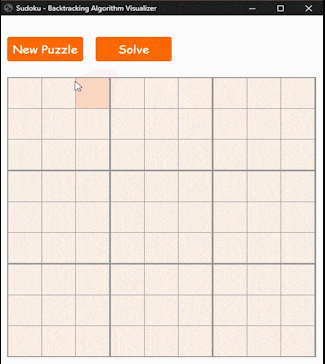

In [ ]:

%%writefile Sudoku.cpp

#include<iostream>
#include<cmath>
using namespace std;

bool isSafe(int mat[][9],int i,int j,int no){


	//Check for row and col
	for(int k=0;k<9;k++){
		if(mat[k][j]==no||mat[i][k]==no){
			return false;
		}
	}
	//check for subgrid

	int sx = (i/3)*3;
	int sy = (j/3)*3;

	for(int x=sx; x<sx + 3;x++){
		for(int y =sy;y<sy + 3;y++){
			if(mat[x][y]==no){
				return false;
			}
		}
	}
	return true;
}




bool solveSudoku(int mat[][9],int i,int j,int n){
	//base case
	if(i==n){
		//print the solution later
		for(int i=0;i<9;i++){
			for(int j=0;j<9;j++){
				cout<<mat[i][j]<<" ";
			}
			cout<<endl;
		}

		return true;
	}

	//rec case
	if(j==n){
		return solveSudoku(mat,i+1,0,n);
	}

	//skip  the prefilled cell
	if(mat[i][j]!=0){
		return solveSudoku(mat,i,j+1,n);
	}

	//cell to be filled
	//try out all possibilites
	for(int no=1;no<=n;no++){
		//whether it is safe to place the number or not
		if(isSafe(mat,i,j,no)){

			mat[i][j] = no;
			bool solveSubproblem = solveSudoku(mat,i,j+1,n);
			if(solveSubproblem==true){
				return true;
			}
		}

	}
	// if no option works, backtracking
	mat[i][j] = 0;
	return false;
}


int main(){
	int n = 9;
	int mat[9][9] =
        {{5,3,0,0,7,0,0,0,0},
        {6,0,0,1,9,5,0,0,0},
        {0,9,8,0,0,0,0,6,0},
        {8,0,0,0,6,0,0,0,3},
        {4,0,0,8,0,3,0,0,1},
        {7,0,0,0,2,0,0,0,6},
        {0,6,0,0,0,0,2,8,0},
        {0,0,0,4,1,9,0,0,5},
        {0,0,0,0,8,0,0,7,9}};


        if(!solveSudoku(mat,0,0,n)){
        	cout<<"No solution exists!";
        }


}

Overwriting Sudoku.cpp


In [ ]:
%%script bash

g++ Sudoku.cpp -std=c++11
./a.out

5 3 4 6 7 8 9 1 2 
6 7 2 1 9 5 3 4 8 
1 9 8 3 4 2 5 6 7 
8 5 9 7 6 1 4 2 3 
4 2 6 8 5 3 7 9 1 
7 1 3 9 2 4 8 5 6 
9 6 1 5 3 7 2 8 4 
2 8 7 4 1 9 6 3 5 
3 4 5 2 8 6 1 7 9 
